# Cloud Cognitive Environments
Plataforma Azure

## Requerimentos

* Boto3
* Matplotlib
* Pandas
* OS
* Requests
* JSON
* OpenCV
* PIL

## Materiais auxiliares

Baixe o repositório abaixo utilizado o comando indicado. Em caso de atualização, apague o diretório antes e depois clone o repositório.

In [ ]:
# Apagar pasta do repositório
# Faça somente isso se não tenha clonado antes
!rm -rf fiap-ds-cloud-cognitive-environments

In [ ]:
%cd ..

/content


In [6]:
# Clonar o repositório da aula
!git clone https://github.com/michelpf/fiap-ds-cloud-cognitive-environments

Cloning into 'fiap-ds-cloud-cognitive-environments'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 195 (delta 6), reused 17 (delta 3), pack-reused 172
Receiving objects: 100% (195/195), 153.47 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (61/61), done.


In [7]:
%cd fiap-ds-cloud-cognitive-environments/

/content/fiap-ds-cloud-cognitive-environments


# Requerimentos AWS

In [1]:
# Instalação da biblioteca Boto3, sempre obter a última versão
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.1 MB/s eta 0:00:00


In [2]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFont
import json
import requests

Crie um usuário dedicado para a aula, conforme indicado no material. Após isso, obtenha a chave de identificação (```ACCESS_ID```) e de acesso (```ACCESS_KEY```).

Nunca versione ou disponibilize as chaves de acesso em repositórios, somente (em último caso quando somente você tem acesso) em repositórios privados.

Utilizaremos a região de ```us-east-1```, região mais barata dos serviços da AWS.

In [3]:
ACCESS_KEY = "chave"
ACCESS_SECRET = "secret"
REGION = "us-east-1"

# Amazon Rekognition Moderation Labels

Modelo customizado para identificar imagens com conteúdo adulto explícito ou violento.

In [14]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_KEY, aws_secret_access_key= ACCESS_SECRET)

# criar cliente
client = session.client('rekognition', region_name=REGION)

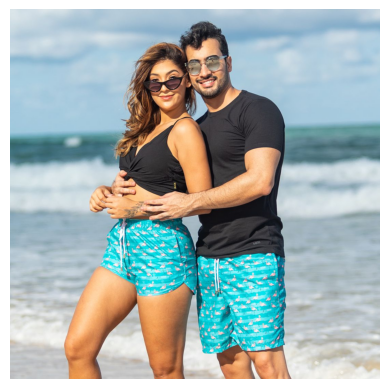

In [15]:
path = "aula-2-audio-imagem-transcricao/imagens/roupa.jpeg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [16]:
with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_moderation_labels(
    Image={'Bytes': bytes_img})

response

{'ModerationLabels': [],
 'ModerationModelVersion': '7.0',
 'ContentTypes': [],
 'ResponseMetadata': {'RequestId': 'f6d5b930-bc45-49c3-ac2e-8601e565b689',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'f6d5b930-bc45-49c3-ac2e-8601e565b689',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '72',
   'date': 'Thu, 08 Feb 2024 00:43:36 GMT'},
  'RetryAttempts': 0}}

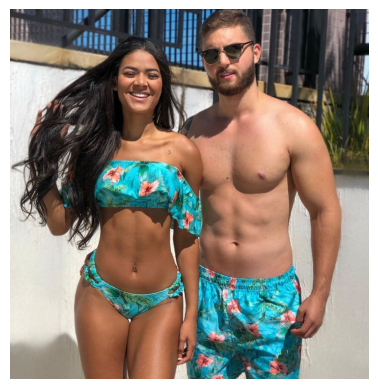

In [17]:
path = "aula-2-audio-imagem-transcricao/imagens/roupa-banho.jpeg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [18]:
with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_moderation_labels(
    Image={'Bytes': bytes_img})

response

{'ModerationLabels': [{'Confidence': 97.43789672851562,
   'Name': 'Non-Explicit Nudity of Intimate parts and Kissing',
   'ParentName': '',
   'TaxonomyLevel': 1},
  {'Confidence': 97.43789672851562,
   'Name': 'Non-Explicit Nudity',
   'ParentName': 'Non-Explicit Nudity of Intimate parts and Kissing',
   'TaxonomyLevel': 2},
  {'Confidence': 97.43789672851562,
   'Name': 'Exposed Male Nipple',
   'ParentName': 'Non-Explicit Nudity',
   'TaxonomyLevel': 3},
  {'Confidence': 58.55329895019531,
   'Name': 'Swimwear or Underwear',
   'ParentName': '',
   'TaxonomyLevel': 1},
  {'Confidence': 58.55329895019531,
   'Name': 'Female Swimwear or Underwear',
   'ParentName': 'Swimwear or Underwear',
   'TaxonomyLevel': 2}],
 'ModerationModelVersion': '7.0',
 'ContentTypes': [],
 'ResponseMetadata': {'RequestId': 'bf334402-bbdf-45ce-86f5-77d4c8e6000b',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'bf334402-bbdf-45ce-86f5-77d4c8e6000b',
   'content-type': 'application/x-amz-jso

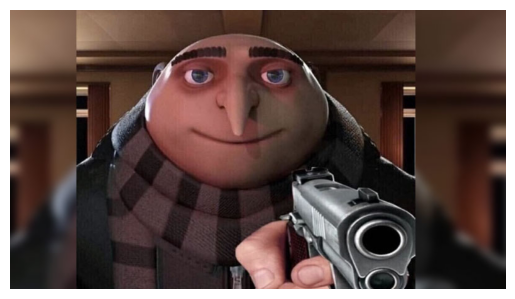

In [19]:
path = "aula-2-audio-imagem-transcricao/imagens/gru.jpg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [20]:
with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_moderation_labels(
    Image={'Bytes': bytes_img})

response

{'ModerationLabels': [{'Confidence': 82.22530364990234,
   'Name': 'Weapons',
   'ParentName': 'Violence',
   'TaxonomyLevel': 2},
  {'Confidence': 82.22530364990234,
   'Name': 'Violence',
   'ParentName': '',
   'TaxonomyLevel': 1},
  {'Confidence': 78.94529724121094,
   'Name': 'Weapon Violence',
   'ParentName': 'Graphic Violence',
   'TaxonomyLevel': 3},
  {'Confidence': 78.94529724121094,
   'Name': 'Graphic Violence',
   'ParentName': 'Violence',
   'TaxonomyLevel': 2}],
 'ModerationModelVersion': '7.0',
 'ContentTypes': [{'Confidence': 69.62689971923828, 'Name': 'Animated'}],
 'ResponseMetadata': {'RequestId': '39f880b2-bf0b-422b-9706-09d401608d6a',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '39f880b2-bf0b-422b-9706-09d401608d6a',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '507',
   'date': 'Thu, 08 Feb 2024 00:44:28 GMT'},
  'RetryAttempts': 0}}

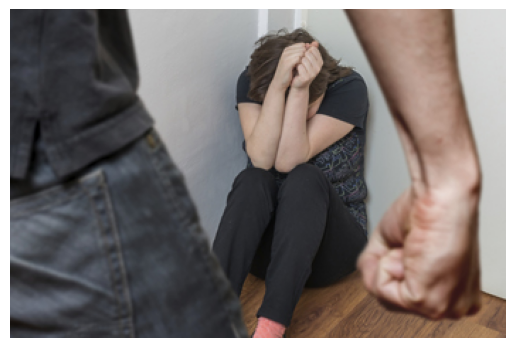

In [21]:
path = "aula-2-audio-imagem-transcricao/imagens/violencia.jpg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [22]:
with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_moderation_labels(
    Image={'Bytes': bytes_img})

response

{'ModerationLabels': [{'Confidence': 51.99480056762695,
   'Name': 'Physical Violence',
   'ParentName': 'Graphic Violence',
   'TaxonomyLevel': 3},
  {'Confidence': 51.99480056762695,
   'Name': 'Graphic Violence',
   'ParentName': 'Violence',
   'TaxonomyLevel': 2},
  {'Confidence': 51.99480056762695,
   'Name': 'Violence',
   'ParentName': '',
   'TaxonomyLevel': 1}],
 'ModerationModelVersion': '7.0',
 'ContentTypes': [],
 'ResponseMetadata': {'RequestId': '5967f2d3-1fe2-46a8-8881-d305bca98d94',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5967f2d3-1fe2-46a8-8881-d305bca98d94',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '367',
   'date': 'Thu, 08 Feb 2024 00:44:54 GMT'},
  'RetryAttempts': 0}}

# Amazon Rekognition Custom Labels

Após o modelo ser treinado na console, vamos ligar a inferência, realizar alguns testes e tornar a encerrar para evitar custos.

In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_KEY, aws_secret_access_key= ACCESS_SECRET)

# criar cliente
client = session.client('rekognition', region_name=REGION)

In [ ]:
project_arn = 'arn:aws:rekognition:us-east-1:989944764342:project/Transportes/1707064275115'
model_arn = 'arn:aws:rekognition:us-east-1:989944764342:project/Transportes/version/Transportes.2024-02-04T13.52.02/1707065521996'
version_name = 'Transportes.2024-02-04T13.52.02'

In [ ]:
# iniciar modelo
response = client.start_project_version(ProjectVersionArn=model_arn, MinInferenceUnits=1)

# aguardar modelo iniciar
project_version_running_waiter = client.get_waiter('project_version_running')
project_version_running_waiter.wait(ProjectArn=project_arn, VersionNames=[version_name])

# verificando status
describe_response = client.describe_project_versions(ProjectArn=project_arn, VersionNames=[version_name])
for model in describe_response['ProjectVersionDescriptions']:
    print("Status: " + model['Status'])
    print("Message: " + model['StatusMessage'])

Realizar uma inferência.

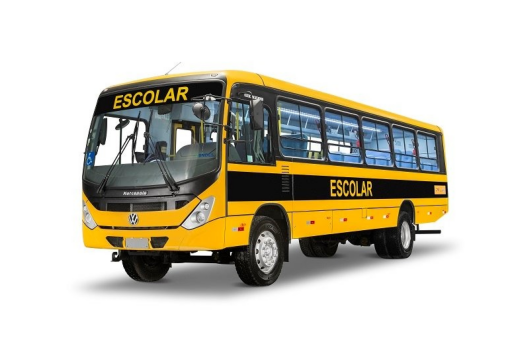

In [24]:
path = "aula-2-audio-imagem-transcricao/imagens/onibus.jpeg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [26]:
with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_custom_labels(
    Image={'Bytes': bytes_img},
        MinConfidence=50,
        ProjectVersionArn=model_arn)

response

{'CustomLabels': [{'Name': 'bus', 'Confidence': 67.46800231933594}],
 'ResponseMetadata': {'RequestId': '61ea8090-e47a-40b4-b539-abd7118c6071',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '61ea8090-e47a-40b4-b539-abd7118c6071',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '64',
   'date': 'Thu, 08 Feb 2024 00:55:32 GMT'},
  'RetryAttempts': 0}}

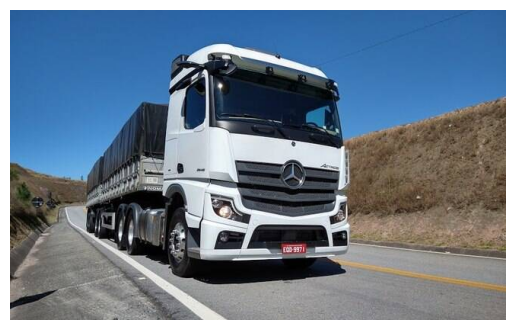

In [13]:
path = "aula-2-audio-imagem-transcricao/imagens/caminhao.jpg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [ ]:
with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_custom_labels(
    Image={'Bytes': bytes_img},
        MinConfidence=50,
        ProjectVersionArn=model_arn)

response

{'CustomLabels': [{'Name': 'truck', 'Confidence': 77.58499908447266}],
 'ResponseMetadata': {'RequestId': '218bfe70-15a1-4452-9441-3083b8e0061a',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '218bfe70-15a1-4452-9441-3083b8e0061a',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '66',
   'date': 'Sun, 04 Feb 2024 17:55:42 GMT'},
  'RetryAttempts': 0}}

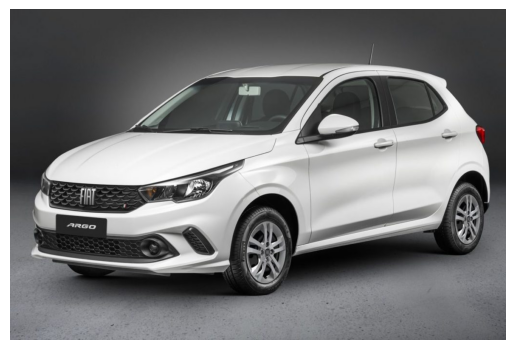

In [ ]:
path = "aula-2-audio-imagem-transcricao/imagens/carro.jpeg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [ ]:
with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_custom_labels(
    Image={'Bytes': bytes_img},
        MinConfidence=50,
        ProjectVersionArn=model_arn)

response

{'CustomLabels': [{'Name': 'car', 'Confidence': 60.284000396728516}],
 'ResponseMetadata': {'RequestId': 'a9127fc7-af75-4e68-9df2-0003a45eb1b4',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'a9127fc7-af75-4e68-9df2-0003a45eb1b4',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '65',
   'date': 'Sun, 04 Feb 2024 17:56:29 GMT'},
  'RetryAttempts': 0}}

Encerrar o endpoint da inferência.

In [ ]:
response = client.stop_project_version(ProjectVersionArn=model_arn)
status=response['Status']
status

'STOPPING'

Vamos criar o dataset programaticamente.
Precisamos fazer uma conversão das anotações do modelo Yolo que é normalizado e no Rekognition precisa ser desnormalizado pois é absoluto.

In [ ]:
!git clone https://github.com/michelpf/dataset-animals

Cloning into 'dataset-animals'...
remote: Enumerating objects: 2975, done.
remote: Total 2975 (delta 0), reused 0 (delta 0), pack-reused 2975
Receiving objects: 100% (2975/2975), 433.18 MiB | 31.41 MiB/s, done.
Updating files: 100% (3009/3009), done.


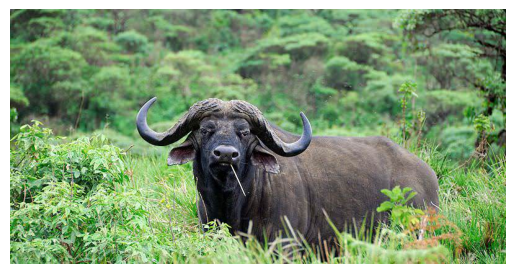

In [ ]:
path = "dataset-animals/images/buffalo/001.jpg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

Conteúdo de uma anotação do padrão Yolo.

In [ ]:
annotation = "dataset-animals/images/buffalo/001.txt"
with open(annotation, 'r') as arquivo:
    conteudo = arquivo.read()

conteudo

'0 0.560000 0.663017 0.617500 0.644769'

```
<class_id> <center_x> <center_y> <width> <height>
```

* class_id: O índice da classe do objeto.
* center_x e center_y: As coordenadas x e y do centro do bounding box, normalizadas em relação à largura e altura da imagem, respectivamente.
* width e height: A largura e altura do bounding box, normalizadas em relação à largura e altura da imagem, respectivamente.

Função para converter o formato Yolo (normalizado) para o formato do Rekognition (absoluto).

In [ ]:
def convert_to_rekognition_format(box, image_width, image_height, class_id):
    center_x, center_y, width, height = box
    abs_width = int(width * image_width)
    abs_height = int(height * image_height)
    abs_x = int(center_x * image_width - (abs_width / 2))
    abs_y = int(center_y * image_height - (abs_height / 2))
    return {
        'width': abs_width,
        'height': abs_height,
        'left': abs_x,
        'top': abs_y,
        'class_id': class_id

    }

Realizando um teste com a função.

In [ ]:
image_height, image_width, _ = imagem.shape
box = float(conteudo.split(' ')[1]), float(conteudo.split(' ')[2]), float(conteudo.split(' ')[3]), float(conteudo.split(' ')[4])

In [ ]:
box

(0.56, 0.663017, 0.6175, 0.644769)

In [ ]:
convert_to_rekognition_format(box, image_width, image_height)

{'Width': 494, 'Height': 265, 'Left': 201, 'Top': 139}

Função para obter o arquivo de anotação baseado no nome do arquivo da imagem.

In [ ]:
def get_annotation(path):
  annotation = path.replace(".jpg", ".txt")
  with open(annotation, 'r') as arquivo:
      conteudo = arquivo.read()

  return conteudo

In [ ]:
get_annotation("dataset-animals/images/buffalo/003.jpg")

'0 0.819167 0.593750 0.148333 0.242500\n0 0.747500 0.472500 0.221667 0.190000\n0 0.524167 0.543750 0.165000 0.232500\n0 0.298333 0.552500 0.266667 0.255000\n0 0.158333 0.553750 0.293333 0.217500'

Separado 20 imagens para treinamento.

In [ ]:
image_list = ["dataset-animals/images/buffalo/001.jpg", "dataset-animals/images/buffalo/002.jpg", "dataset-animals/images/buffalo/003.jpg",
              "dataset-animals/images/buffalo/004.jpg", "dataset-animals/images/buffalo/005.jpg", "dataset-animals/images/buffalo/006.jpg",
              "dataset-animals/images/buffalo/007.jpg", "dataset-animals/images/buffalo/008.jpg", "dataset-animals/images/buffalo/009.jpg",
              "dataset-animals/images/buffalo/010.jpg", "dataset-animals/images/buffalo/011.jpg", "dataset-animals/images/buffalo/012.jpg",
              "dataset-animals/images/buffalo/013.jpg", "dataset-animals/images/buffalo/014.jpg", "dataset-animals/images/buffalo/015.jpg",
              "dataset-animals/images/buffalo/016.jpg", "dataset-animals/images/buffalo/017.jpg", "dataset-animals/images/buffalo/018.jpg",
              "dataset-animals/images/buffalo/019.jpg", "dataset-animals/images/buffalo/020.jpg"]

Formato do JSON de manifesto com as informações de rótulo de objetos.

In [ ]:
{
    "source-ref":"s3://bucket/image",
 "BB":{
     "annotations":[
         {"left":1849,"top":1039,"width":422,"height":283,"class_id":0},
          {"left":1849,"top":1340,"width":443,"height":415,"class_id":1},
           {"left":2637,"top":1380,"width":676,"height":338,"class_id":2},
            {"left":2634,"top":1051,"width":673,"height":338,"class_id":3}
         ],
     "image_size":[
         {"width":4000,"height":2667,"depth":3}
         ]
     },"BB-metadata":{"job-name":"labeling-job/BB","class-map":{"0":"comparator","1":"pot_resistor","2":"ir_phototransistor","3":"ir_led"},"human-annotated":"yes","objects":[{"confidence":1},{"confidence":1},{"confidence":1},{"confidence":1}],"creation-date":"2021-06-22T10:11:18.006Z","type":"groundtruth/object-detection"}}


In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criar cliente
client = session.client('rekognition', region_name=region)

Criar um projeto novo.

In [ ]:
project_name = 'Buffalo'

response = client.create_project(ProjectName=project_name)
project_arn = response['ProjectArn']

project_arn

'arn:aws:rekognition:us-east-1:989944764342:project/Buffalo/1707174052427'

Criar um conjunto de dados de treinamento.

In [ ]:
dataset_name = 'Buffalo_Images'

response = client.create_dataset(ProjectArn=project_arn, DatasetType='TRAIN')

dataset_arn = response['DatasetArn']

Construir um arquivo de manifesto com os dados de anotação.

In [ ]:
files = []
with open('arquivo.json', 'w') as arquivo:

  for image in image_list:

    object_image = {}
    bounding_boxes = []
    objects = []

    print(image)

    object_image["source-ref"] = "s3://fiap-cognitive-platforms/datasets/animals/buffalo/"+image.split("/")[3]


    imagem = mpimg.imread(image)
    image_height, image_width, _ = imagem.shape
    annotations = get_annotation(image)

    for annotation in annotations.split("\n"):
      box = float(annotation.split(' ')[1]), float(annotation.split(' ')[2]), float(annotation.split(' ')[3]), float(annotation.split(' ')[4])
      new_format = convert_to_rekognition_format(box, image_width, image_height, 1)
      bounding_boxes.append(new_format)
      objects.append({"confidence": 1})

    object_image["BB"] = {"annotations": bounding_boxes, "image_size": [{"width":image_width, "height":image_height, "depth":3}]}
    object_image["BB-metadata"] = {"job-name":"labeling-job/BB","class-map":{"1":"buffalo"}, "human-annotated": "yes", "objects": objects, "creation-date": "2024-02-04T10:11:18.006Z", "type": "groundtruth/object-detection"}

    json_string = json.dumps(object_image)
    arquivo.write(json_string + "\n")

dataset-animals/images/buffalo/001.jpg
dataset-animals/images/buffalo/002.jpg
dataset-animals/images/buffalo/003.jpg
dataset-animals/images/buffalo/004.jpg
dataset-animals/images/buffalo/005.jpg
dataset-animals/images/buffalo/006.jpg
dataset-animals/images/buffalo/007.jpg
dataset-animals/images/buffalo/008.jpg
dataset-animals/images/buffalo/009.jpg
dataset-animals/images/buffalo/010.jpg
dataset-animals/images/buffalo/011.jpg
dataset-animals/images/buffalo/012.jpg
dataset-animals/images/buffalo/013.jpg
dataset-animals/images/buffalo/014.jpg
dataset-animals/images/buffalo/015.jpg
dataset-animals/images/buffalo/016.jpg
dataset-animals/images/buffalo/017.jpg
dataset-animals/images/buffalo/018.jpg
dataset-animals/images/buffalo/019.jpg
dataset-animals/images/buffalo/020.jpg


Preparar o payload.

In [ ]:
with open('arquivo.json', 'r') as arquivo:
    conteudo_json = arquivo.read()

json_string = json.dumps(conteudo_json)
bytes_data = json.loads(json_string)

object_images = { "GroundTruth" : bytes_data }

Comando para enviar uma única imagem.

In [ ]:
response = client.update_dataset_entries(
    DatasetArn = dataset_arn,
    Changes = object_images
)

In [ ]:
response

{'ResponseMetadata': {'RequestId': '97fd872a-c7d8-4155-8567-375c47959e7b',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '97fd872a-c7d8-4155-8567-375c47959e7b',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '2',
   'date': 'Mon, 05 Feb 2024 23:50:23 GMT'},
  'RetryAttempts': 0}}

Verificar se as imagens foram devidamente copiadas.

In [ ]:
 response = client.list_dataset_entries(
                DatasetArn=dataset_arn,
                MaxResults=100)
 response

{'DatasetEntries': ['{"source-ref":"s3://fiap-cognitive-platforms/datasets/animals/buffalo/001.jpg","BB":{"annotations":[{"width":494,"height":265,"left":201,"top":139,"class_id":1}],"image_size":[{"width":800,"height":411,"depth":3}]},"BB-metadata":{"job-name":"labeling-job/BB","class-map":{"1":"buffalo"},"human-annotated":"yes","objects":[{"confidence":1}],"creation-date":"2024-02-04T10:11:18.006Z","type":"groundtruth/object-detection"},"cl-metadata":{"is_labeled":true}}',
  '{"source-ref":"s3://fiap-cognitive-platforms/datasets/animals/buffalo/002.jpg","BB":{"annotations":[{"width":309,"height":347,"left":140,"top":37,"class_id":1}],"image_size":[{"width":623,"height":415,"depth":3}]},"BB-metadata":{"job-name":"labeling-job/BB","class-map":{"1":"buffalo"},"human-annotated":"yes","objects":[{"confidence":1}],"creation-date":"2024-02-04T10:11:18.006Z","type":"groundtruth/object-detection"},"cl-metadata":{"is_labeled":true}}',
  '{"source-ref":"s3://fiap-cognitive-platforms/datasets/an

Apagar o conjunto de dados.

In [ ]:
 client.delete_dataset(DatasetArn=dataset_arn)

{'ResponseMetadata': {'RequestId': 'aae77c6f-a350-43a9-b7f7-49b45583de81',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'aae77c6f-a350-43a9-b7f7-49b45583de81',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '2',
   'date': 'Mon, 05 Feb 2024 23:50:02 GMT'},
  'RetryAttempts': 0}}

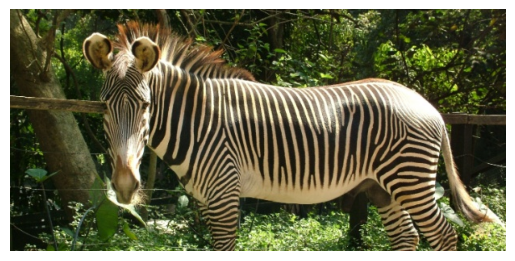

In [ ]:
path = "aula-2-audio-imagem-transcricao/imagens/zebra.jpg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [ ]:
model_arn='arn:aws:rekognition:us-east-1:989944764342:project/Animais/version/Animais.2024-02-04T21.13.57/1707092036915'

with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_custom_labels(
    Image={'Bytes': bytes_img},
        MinConfidence=50,
        ProjectVersionArn=model_arn)

response

{'CustomLabels': [{'Name': 'zebra',
   'Confidence': 89.15499877929688,
   'Geometry': {'BoundingBox': {'Width': 0.8374999761581421,
     'Height': 0.9529100060462952,
     'Left': 0.14809000492095947,
     'Top': 0.041600000113248825}}}],
 'ResponseMetadata': {'RequestId': 'c08f2c6e-586a-4712-87d0-9f56e23b1585',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'c08f2c6e-586a-4712-87d0-9f56e23b1585',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '204',
   'date': 'Tue, 06 Feb 2024 00:10:40 GMT'},
  'RetryAttempts': 0}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont

imagem_analise = Image.open(path)
imgWidth, imgHeight = imagem_analise.size

draw = ImageDraw.Draw(imagem_analise)

for item in response["CustomLabels"]:
  print("Name " + str(item))

  box = item["Geometry"]["BoundingBox"]

  top = imgHeight * box["Top"]
  height = imgHeight * box["Height"]
  left = imgWidth * box["Left"]
  width = imgWidth * box["Width"]

  draw.rectangle([left, top, left + width, top + height], outline="#00d400")

Name {'Name': 'zebra', 'Confidence': 89.15499877929688, 'Geometry': {'BoundingBox': {'Width': 0.8374999761581421, 'Height': 0.9529100060462952, 'Left': 0.14809000492095947, 'Top': 0.041600000113248825}}}


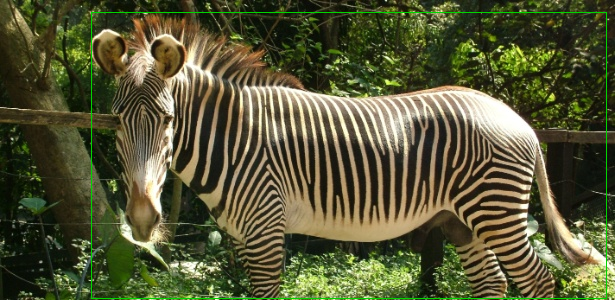

In [ ]:
imagem_analise

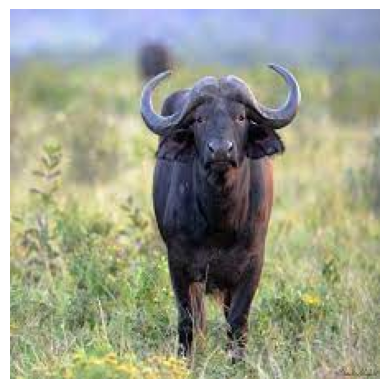

In [ ]:
path = "aula-2-audio-imagem-transcricao/imagens/bufalo.jpg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

In [ ]:
model_arn='arn:aws:rekognition:us-east-1:989944764342:project/Buffalo/version/Buffalo.2024-02-05T20.55.12/1707177312926'

with open(path, "rb") as file:
  img = file.read()
  bytes_img = bytearray(img)

response = client.detect_custom_labels(
    Image={'Bytes': bytes_img},
        MinConfidence=50,
        ProjectVersionArn=model_arn)

response

{'CustomLabels': [{'Name': 'buffalo',
   'Confidence': 94.17300415039062,
   'Geometry': {'BoundingBox': {'Width': 0.42895999550819397,
     'Height': 0.8270099759101868,
     'Left': 0.3497900068759918,
     'Top': 0.14168000221252441}}}],
 'ResponseMetadata': {'RequestId': 'c1a2d9b0-33a7-454b-9258-750dbf849614',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'c1a2d9b0-33a7-454b-9258-750dbf849614',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '205',
   'date': 'Tue, 06 Feb 2024 01:09:19 GMT'},
  'RetryAttempts': 0}}

In [ ]:
imagem_analise = Image.open(path)
imgWidth, imgHeight = imagem_analise.size

draw = ImageDraw.Draw(imagem_analise)

for item in response["CustomLabels"]:
  print("Name " + str(item))

  box = item["Geometry"]["BoundingBox"]

  top = imgHeight * box["Top"]
  height = imgHeight * box["Height"]
  left = imgWidth * box["Left"]
  width = imgWidth * box["Width"]

  draw.rectangle([left, top, left + width, top + height], outline="#00d400")

Name {'Name': 'buffalo', 'Confidence': 94.17300415039062, 'Geometry': {'BoundingBox': {'Width': 0.42895999550819397, 'Height': 0.8270099759101868, 'Left': 0.3497900068759918, 'Top': 0.14168000221252441}}}


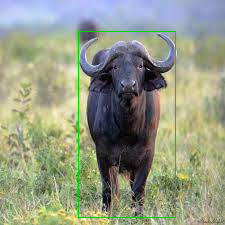

In [ ]:
imagem_analise

# Amazon Polly

Serviço para geração de voz a partir de texto.
É compatível com a linguagem de marcação SSML.

Consulte [documentação](https://docs.aws.amazon.com/polly/index.html).

## Audio padrão

Neste exemplo passamos um texto para ser gerado um áudio.
Podemos configurar, entre outras coisas, o texto, o motor de conversão, o formato de saída, o tipo de texto (ou SSML) e a voz para a gravação.

In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criar cliente
client = session.client("polly", region_name=region)

# iniciat requisição para atividade de geração de áudio
response = client.start_speech_synthesis_task(
    Engine='neural',
    LanguageCode='pt-BR',
    OutputFormat='mp3',
    OutputS3BucketName='fiap-cognitive-platforms',
    OutputS3KeyPrefix='text-to-audio/',
    Text='Olá, isso é um teste de fala do Polly.',
    TextType='text',
    VoiceId='Camila'
)

response

{'ResponseMetadata': {'RequestId': 'ca50a8b7-5d2e-4062-b09a-eca9835ae3c3',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'ca50a8b7-5d2e-4062-b09a-eca9835ae3c3',
   'content-type': 'application/json',
   'content-length': '527',
   'date': 'Sat, 05 Aug 2023 20:39:30 GMT'},
  'RetryAttempts': 0},
 'SynthesisTask': {'Engine': 'neural',
  'TaskId': '3ecf5549-0d86-45e4-9f15-e5e3188d04af',
  'TaskStatus': 'scheduled',
  'OutputUri': 'https://s3.us-east-1.amazonaws.com/fiap-cognitive-platforms/text-to-audio/.3ecf5549-0d86-45e4-9f15-e5e3188d04af.mp3',
  'CreationTime': datetime.datetime(2023, 8, 5, 20, 39, 31, 287000, tzinfo=tzlocal()),
  'RequestCharacters': 38,
  'OutputFormat': 'mp3',
  'TextType': 'text',
  'VoiceId': 'Camila',
  'LanguageCode': 'pt-BR'}}

## Audio gerado a partir de SSML

No exemplo a seguir utiliza a linguagem de marcação SSML, que permite utilizar efeitos como pausas, tom de voz e outros efeitos.

Consulte [esta referência](https://docs.aws.amazon.com/polly/latest/dg/supportedtags.html) para conhecer todas as tags SSML disponíveis neste serviço.

In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criar cliente
client = session.client("polly", region_name=region)

# texto a ser gerado utilizando linguagem de marcação SSML
texto_ssml = """
<speak>
     Boa a noite a todos.<break time="1s"/>Hoje, a aula de Plataformas Cognitivas na
     <sub alias="fiap">FIAP</sub> será realizada com o professor Michel.
     Espero que tenham uma boa aula!
     <amazon:effect name="whispered">"Ah, é uma das minhas disciplinas favoritas!"</amazon:effect>
</speak>
"""

# envio de requisição
response = client.start_speech_synthesis_task(
    Engine='neural',
    LanguageCode='pt-BR',
    OutputFormat='mp3',
    OutputS3BucketName='fiap-cognitive-platforms',
    OutputS3KeyPrefix='text-to-audio/',
    Text=texto_ssml,
    TextType='ssml',
    VoiceId='Camila'
)

# respota do serviço
response

{'ResponseMetadata': {'RequestId': '9caee327-9c6d-4500-b86b-8c8efd12a3e7',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '9caee327-9c6d-4500-b86b-8c8efd12a3e7',
   'content-type': 'application/json',
   'content-length': '528',
   'date': 'Mon, 07 Aug 2023 00:56:20 GMT'},
  'RetryAttempts': 0},
 'SynthesisTask': {'Engine': 'neural',
  'TaskId': '61eedc2b-425a-4c67-8d8d-25ff6ff0765b',
  'TaskStatus': 'scheduled',
  'OutputUri': 'https://s3.us-east-1.amazonaws.com/fiap-cognitive-platforms/text-to-audio/.61eedc2b-425a-4c67-8d8d-25ff6ff0765b.mp3',
  'CreationTime': datetime.datetime(2023, 8, 7, 0, 56, 20, 744000, tzinfo=tzlocal()),
  'RequestCharacters': 184,
  'OutputFormat': 'mp3',
  'TextType': 'ssml',
  'VoiceId': 'Camila',
  'LanguageCode': 'pt-BR'}}

In [ ]:
path = "aula-2-audio-imagem-transcricao/imagens/zebra.jpg"

imagem = mpimg.imread(path)
img_plot = plt.imshow(imagem)

plt.axis('off')
plt.show()

# Amazon Transcribe

Serviço para transcrever em texto a partir de gravações de voz.
É capaz de separar as pessoas que são identificadas na gravação.

Consulte a [documentação](https://docs.aws.amazon.com/transcribe/index.html).

## Transcrição padrão

In [ ]:
# abrir sessão
session = boto3.Session(aws_access_key_id=ACCESS_ID, aws_secret_access_key= ACCESS_KEY)

# criar cliente
client = session.client("transcribe", region_name=region)

response = client.start_transcription_job(
    TranscriptionJobName="PodcastDecodeTranscription",
    LanguageCode="pt-BR",
    MediaFormat="mp3",
    Media={
        "MediaFileUri": "s3://fiap-cognitive-platforms/audio/podcast-decode-fiap/decode-28.mp3",
    },
    OutputBucketName="fiap-cognitive-platforms",
    OutputKey="audio/podcast-decode-fiap/transcription/",
    Settings={
        'ShowSpeakerLabels': True,
        'MaxSpeakerLabels': 3,
        'ChannelIdentification': True,
    },
    JobExecutionSettings={
        "AllowDeferredExecution": True,
        "DataAccessRoleArn": "arn:aws:iam::989944764342:role/ComprehendJob"
    },
    Subtitles={
        'Formats': [
            'vtt','srt',
        ],
    }
)

In [ ]:
response

{'TranscriptionJob': {'TranscriptionJobName': 'PodcastDecodeTranscription',
  'TranscriptionJobStatus': 'IN_PROGRESS',
  'LanguageCode': 'pt-BR',
  'MediaFormat': 'mp3',
  'Media': {'MediaFileUri': 's3://fiap-cognitive-platforms/audio/podcast-decode-fiap/decode-28.mp3'},
  'StartTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 137000, tzinfo=tzlocal()),
  'CreationTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 105000, tzinfo=tzlocal()),
  'Settings': {'ShowSpeakerLabels': True,
   'MaxSpeakerLabels': 3,
   'ChannelIdentification': True},
  'Subtitles': {'Formats': ['vtt', 'srt']}},
 'ResponseMetadata': {'RequestId': 'c670be98-0e65-482b-9269-d519c8b32159',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'c670be98-0e65-482b-9269-d519c8b32159',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '440',
   'date': 'Tue, 08 Aug 2023 00:57:00 GMT'},
  'RetryAttempts': 0}}

In [ ]:
response = client.get_transcription_job(
    TranscriptionJobName="PodcastDecodeTranscription"
)

response

{'TranscriptionJob': {'TranscriptionJobName': 'PodcastDecodeTranscription',
  'TranscriptionJobStatus': 'COMPLETED',
  'LanguageCode': 'pt-BR',
  'MediaSampleRateHertz': 44100,
  'MediaFormat': 'mp3',
  'Media': {'MediaFileUri': 's3://fiap-cognitive-platforms/audio/podcast-decode-fiap/decode-28.mp3'},
  'Transcript': {'TranscriptFileUri': 'https://s3.us-east-1.amazonaws.com/fiap-cognitive-platforms/audio/podcast-decode-fiap/transcription/PodcastDecodeTranscription.json'},
  'StartTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 137000, tzinfo=tzlocal()),
  'CreationTime': datetime.datetime(2023, 8, 8, 0, 57, 1, 105000, tzinfo=tzlocal()),
  'CompletionTime': datetime.datetime(2023, 8, 8, 1, 0, 4, 17000, tzinfo=tzlocal()),
  'Settings': {'ShowSpeakerLabels': True,
   'MaxSpeakerLabels': 3,
   'ChannelIdentification': True,
   'ShowAlternatives': False},
  'JobExecutionSettings': {'AllowDeferredExecution': True,
   'DataAccessRoleArn': 'arn:aws:iam::989944764342:role/ComprehendJob'},
  'Sub

## Analisando resultados

In [ ]:
bucket_name = "fiap-cognitive-platforms"
object_key = "audio/podcast-decode-fiap/transcription/PodcastDecodeTranscription.json"
file_name = "PodcastDecodeTranscription.json"

client = session.client("s3")

response = client.download_file(bucket_name, object_key, file_name)

response

In [ ]:
import json

with open(file_name, 'r') as json_file:
  json_data = json.load(json_file)

In [ ]:
json_data

{'jobName': 'PodcastDecodeTranscription',
 'accountId': '989944764342',
 'results': {'transcripts': [{'transcript': 'salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o Albérico de Castro. É um prazer enorme ter vocês dois. Só que no The Code

In [ ]:
json_data["results"]["transcripts"][0]["transcript"]

'salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta que eles criaram e a greve de Hollywood batendo na inteligência artificial. Esse é o T code Eu sou André Davi, e estou aqui com dois grandes especialistas para bater um papo sobre um dos assuntos mais pedidos do T code, que é a inteligência artificial. Os especialistas são Henrique Ferreira e o Albérico de Castro. É um prazer enorme ter vocês dois. Só que no The Code ninguém tem nem tempo de respirar, porque os nossos dez minutos começam. Agora, logo no nosso primeiro bloco eu que

In [ ]:
transcricao = json_data["results"]["transcripts"][0]["transcript"]

## Analisando resultado com Comprehend

Detecção de pontos chave, utilizado para identificar palavras chave.

In [ ]:
client = session.client("comprehend", region_name=region)

response = client.detect_key_phrases(
    Text=transcricao,
    LanguageCode='pt',
)

response

{'KeyPhrases': [{'Score': 0.9766974449157715,
   'Text': 'salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta',
   'BeginOffset': 0,
   'EndOffset': 108},
  {'Score': 0.9958714842796326,
   'Text': 'que',
   'BeginOffset': 109,
   'EndOffset': 112},
  {'Score': 0.9960136413574219,
   'Text': 'eles',
   'BeginOffset': 113,
   'EndOffset': 117},
  {'Score': 0.9986566305160522,
   'Text': 'a greve de Hollywood',
   'BeginOffset': 128,
   'EndOffset': 148},
  {'Score': 0.9851077795028687,
   'Text': 'inteligência artificial',
   'BeginOffset': 160,
   'EndOffset': 183},
  {'Score': 0.9964789748191833,
   'Text': 'Esse',
   'BeginOffset': 185,
   'EndOffset': 189},
  {'Score': 0.931208074092865,
   'Text': 'o T code',
   'BeginOffset': 192,
   'EndOffset': 200},
  {'Score': 0.775880753993988,
   'Text': 'Eu',
   'BeginOffset': 201,
   'EndOffset': 203},
  {'Score': 0.9583021998405457,
   'Text': 'André Davi',
   'BeginOffset': 208,
  

Filtrando entidade cuja pontuação (ou grau de confiança) seja maior que 50%.

In [ ]:
for item in response["KeyPhrases"]:
  if item["Score"] > 0.5:
    print(item["Text"])

salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com uma nova ferramenta
que
eles
a greve de Hollywood
inteligência artificial
Esse
o T code
Eu
André Davi
dois grandes especialistas
um papo sobre um dos assuntos mais pedidos do T code
que
a inteligência artificial
Os especialistas
Henrique Ferreira
o salários de até catorze mil na área de A os jornalistas, bem irritados com o Google, com
uma nova ferramenta
que
eles
a greve de Hollywood batendo
inteligência artificial
Esse
o T code Eu
André Davi
dois grandes especialistas
um papo sobre um dos assuntos mais pedidos do T code
que
a inteligência artificial
Os especialistas
Henrique Ferreira
o Albérico de Castro
um prazer enorme
vocês
dois
The Code
ninguém
nem tempo
os nossos dez minutos
logo
primeiro bloco
eu
um assunto polêmico
que
a gente
risada
bastidores
Revista Forbes
salários de até catorze mil na área de A sendo
uma nova habilidade
Albérico de Castro
um prazer enorme
vocês
dois
The Code
ninguém
n

Buscando entidades, também utilizado para aperfeiçoar as palavras-chave.

In [ ]:
# criando o cliente
client = session.client("comprehend", region_name=region)

# executando a requisição
response = client.detect_entities(
    Text=transcricao,
    LanguageCode='pt',
)

response

{'Entities': [{'Score': 0.7234151363372803,
   'Type': 'QUANTITY',
   'Text': 'até catorze mil',
   'BeginOffset': 12,
   'EndOffset': 27},
  {'Score': 0.9189767241477966,
   'Type': 'ORGANIZATION',
   'Text': 'Google',
   'BeginOffset': 77,
   'EndOffset': 83},
  {'Score': 0.44337570667266846,
   'Type': 'LOCATION',
   'Text': 'Hollywood',
   'BeginOffset': 139,
   'EndOffset': 148},
  {'Score': 0.8781716823577881,
   'Type': 'TITLE',
   'Text': 'T code',
   'BeginOffset': 194,
   'EndOffset': 200},
  {'Score': 0.9860484004020691,
   'Type': 'PERSON',
   'Text': 'André Davi',
   'BeginOffset': 208,
   'EndOffset': 218},
  {'Score': 0.9274246692657471,
   'Type': 'QUANTITY',
   'Text': 'dois grandes especialistas',
   'BeginOffset': 237,
   'EndOffset': 263},
  {'Score': 0.9009780287742615,
   'Type': 'QUANTITY',
   'Text': 'um dos assuntos mais pedidos',
   'BeginOffset': 289,
   'EndOffset': 317},
  {'Score': 0.8716566562652588,
   'Type': 'TITLE',
   'Text': 'T code',
   'BeginOffse

Filtrando _Score_ maior que 70%, para aumentar a confiança nas entidades.

In [ ]:
for item in response["Entities"]:
  if item["Score"] > 0.7:
    print(item)

{'Score': 0.7234151363372803, 'Type': 'QUANTITY', 'Text': 'até catorze mil', 'BeginOffset': 12, 'EndOffset': 27}
{'Score': 0.9189767241477966, 'Type': 'ORGANIZATION', 'Text': 'Google', 'BeginOffset': 77, 'EndOffset': 83}
{'Score': 0.8781716823577881, 'Type': 'TITLE', 'Text': 'T code', 'BeginOffset': 194, 'EndOffset': 200}
{'Score': 0.9860484004020691, 'Type': 'PERSON', 'Text': 'André Davi', 'BeginOffset': 208, 'EndOffset': 218}
{'Score': 0.9274246692657471, 'Type': 'QUANTITY', 'Text': 'dois grandes especialistas', 'BeginOffset': 237, 'EndOffset': 263}
{'Score': 0.9009780287742615, 'Type': 'QUANTITY', 'Text': 'um dos assuntos mais pedidos', 'BeginOffset': 289, 'EndOffset': 317}
{'Score': 0.8716566562652588, 'Type': 'TITLE', 'Text': 'T code', 'BeginOffset': 321, 'EndOffset': 327}
{'Score': 0.9936051964759827, 'Type': 'PERSON', 'Text': 'Henrique Ferreira', 'BeginOffset': 383, 'EndOffset': 400}
{'Score': 0.8696974515914917, 'Type': 'QUANTITY', 'Text': 'até catorze mil', 'BeginOffset': 417,

Identificando o sentimento geral do documento.
Neste caso estamos truncado o texto devido ao limite da API ser de até 5000 bytes.

In [ ]:
# criando cliente
client = session.client("comprehend", region_name=region)

# limitando o tamanho do texto para caber no limite de 5000 bytes
response = client.detect_sentiment(
    Text=transcricao[:4000],
    LanguageCode='pt',
)

response

{'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Positive': 0.039849765598773956,
  'Negative': 0.010610549710690975,
  'Neutral': 0.9494221210479736,
  'Mixed': 0.00011755369632737711},
 'ResponseMetadata': {'RequestId': '3bb7bfc5-4451-45f3-8cb9-1836ba8de1cd',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '3bb7bfc5-4451-45f3-8cb9-1836ba8de1cd',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '165',
   'date': 'Tue, 08 Aug 2023 01:27:49 GMT'},
  'RetryAttempts': 0}}